In [151]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from textwrap import wrap
import cv2
import random

/usr/local/Cellar/ipython@5/5.5.0_1/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/Cellar/ipython@5/5.5.0_1/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


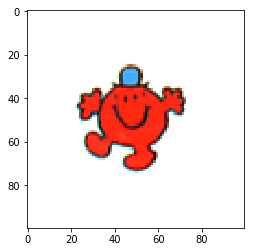

In [190]:
def heightWidth(image):
    #width is the bigger one, the second one
    return image.shape[0], image.shape[1]
    
def getHistogram(data):
    return np.histogramdd(data, normed=False, range = ([[0,255],[0,255],[0,255]]))

# change stuff
def masking(image):
    foreground = np.array([0, 0, 0])
    background = np.array([0, 0, 0])
    
    for row in image:
        for pixel in row:
            if (np.abs(pixel[0] - pixel[1]) < 30):
                foreground = np.vstack((foreground, pixel))
            else:
                background = np.vstack((background, pixel))
    
    foreHist, foreEdges = getHistogram(foreground[1:])
    backHist, backEdges = getHistogram(background[1:])
    
    return (foreHist, foreEdges), (backHist, backEdges)


seg_image = imread("../images/mrworry.png")
(foreHist, foreEdges), (backHist, backEdges) = masking(seg_image)
value = seg_image[(10,15)]
r, g, b = [x/255 for x in [value[0], value[1], value[2]]]
# h, l, s = colorsys.rgb_to_hls(r, g, b)
# print (h, l, s)  # do for seg 10 to 60 and 30 to 30 etc.

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(seg_image, cmap="gray")
plt.show()




In [191]:
def neighbours(i,j,M,N,size):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
        return n
    
def getBinIndex(y_i):
    rBin, gBin, bBin = 0, 0, 0
    for i in range(1, len(foreEdges[0])):
        if y_i[0] <= 25.5*i and i > 25.5*(i-1):
            rBin = i-1
        if y_i[1] <= 25.5*i and i > 25.5*(i-1):
            gBin = i
        if y_i[2] <= 25.5*i and i > 25.5*(i-1):
            bBin = i
    binIndex = [rBin, gBin, bBin]
    return binIndex

def getNormalisedBinHeight(histIndex, hist):
    #print np.sum(hist[histIndex])/np.sum(hist)
    return np.sum(hist[histIndex])/np.sum(hist)

def singleSegLikelihood(y_i, x_i):
    foreIndex = getBinIndex(y_i)
    #print (foreIndex)
    probF = getNormalisedBinHeight(foreIndex, foreHist)
    backIndex = getBinIndex(y_i)
    probB = getNormalisedBinHeight(backIndex, backHist)
    return probF, probB

def prior_pos_neg(xImage, point, wHigh, wLow):
    expSum_pos = 0
    expSum_neg = 0
    H, W = heightWidth(xImage)
    i, j = point[0], point[1]
    ns = neighbours(i, j, H, W, size=4)
    for neighbour in ns:
        xImage[point] = 1
        if(xImage[point] == xImage[neighbour]):
            expSum_pos += xImage[neighbour] * xImage[point] * wHigh
        else:
            expSum_pos += xImage[neighbour] * xImage[point] * wLow
        xImage[point] = -1
        if(xImage[point] == xImage[neighbour]):
            expSum_neg += xImage[neighbour] * xImage[point] * wHigh
        else:
            expSum_neg += xImage[neighbour] * xImage[point] * wLow
    return np.exp(expSum_pos), np.exp(expSum_neg)                


def condProb(image, point, ximage, wHigh, wLow):  # issue with this?
    imPoint = image[point]
    xPoint = ximage[point]
    LP, LN = singleSegLikelihood(imPoint, xPoint)
    PP, PN = prior_pos_neg(ximage, point, wHigh, wLow)
    numerator = LP * PP
    denominator = LN * PN
    return np.divide(numerator, numerator+denominator)


/usr/local/Cellar/ipython@5/5.5.0_1/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Cellar/ipython@5/5.5.0_1/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


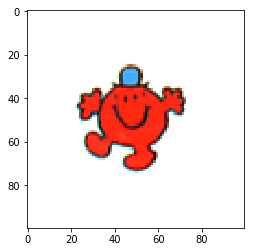

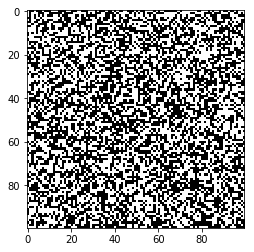

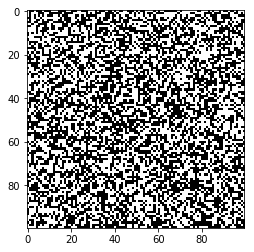

('Iteration: ', 0)


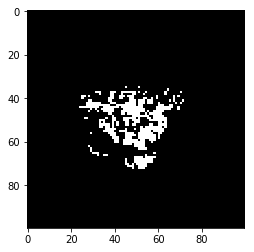

('Iteration: ', 1)


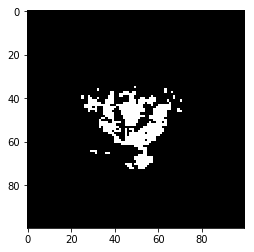

('Iteration: ', 2)


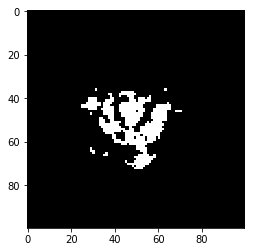

('Iteration: ', 3)


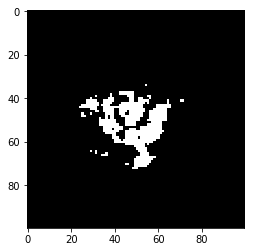

('Iteration: ', 4)


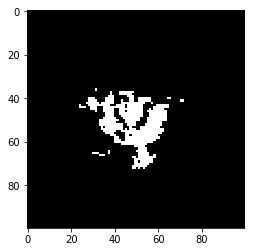

('Iteration: ', 5)


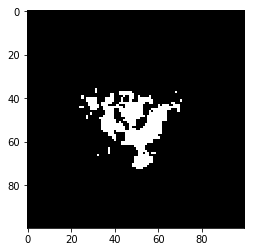

('Iteration: ', 6)


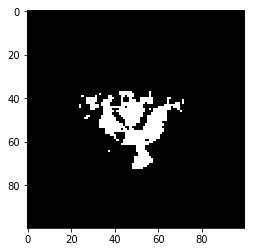

('Iteration: ', 7)


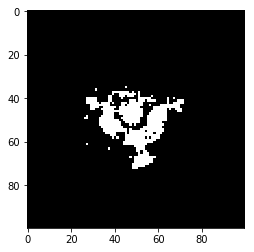

('Iteration: ', 8)


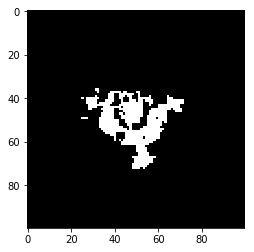

('Iteration: ', 9)


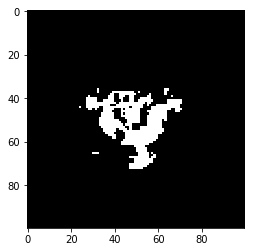

('Iteration: ', 10)


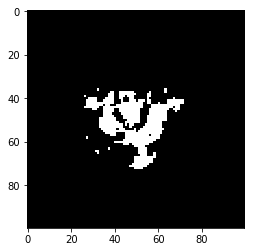

('Iteration: ', 11)


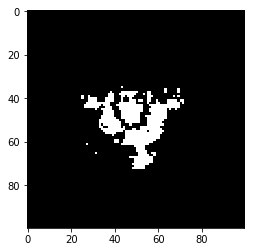

('Iteration: ', 12)


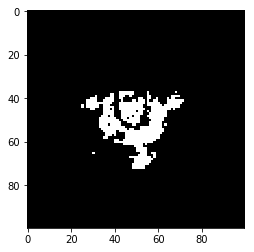

('Iteration: ', 13)


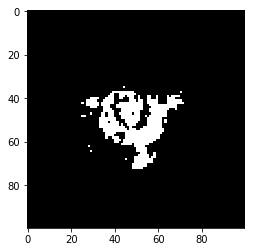

('Iteration: ', 14)


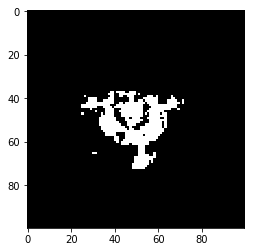

('Iteration: ', 15)


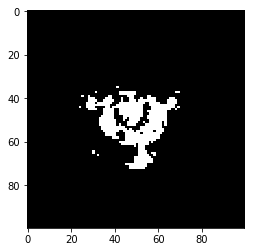

('Iteration: ', 16)


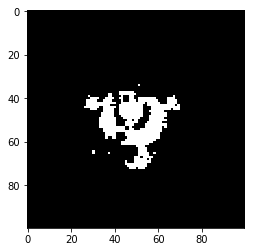

('Iteration: ', 17)


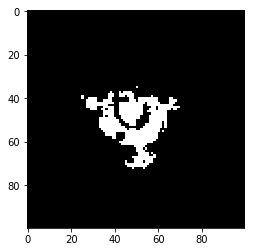

('Iteration: ', 18)


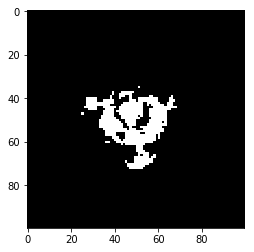

('Iteration: ', 19)


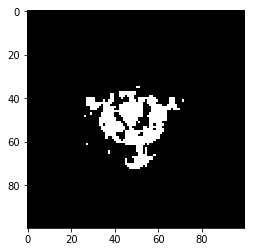

('Iteration: ', 20)


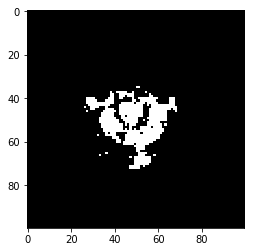

('Iteration: ', 21)


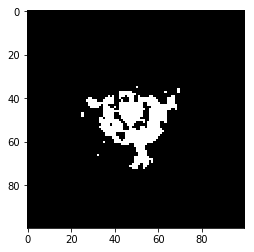

('Iteration: ', 22)


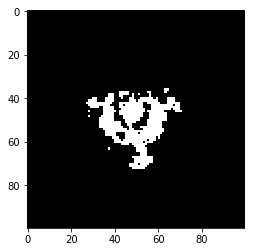

KeyboardInterrupt: 

In [192]:
im1 = cv2.imread("../images/manan.jpg")
im2 = cv2.imread("../images/mike.jpg")
im3 = imread("../images/mrworry.png")
im4 = imread("../images/clifford_resize.jpg")

def GibbsSampling(image):
    H, W = heightWidth(image)
    plt.imshow(image, interpolation='nearest')
    plt.show()
    seg_imageRGB = seg_image.reshape(W*H, 3)
    X = np.random.choice([0,1], size = seg_imageRGB.shape[0], p = [1./2, 1./2])
    X_2D = X.reshape(H, W)
    lim = 80
    
    fig = plt.figure()
    ax5 = fig.add_subplot(111)
    ax5.imshow(X_2D, cmap="gray")
    plt.show()
    
    for iteration in range(lim):
        #X_2D = X.reshape(H, W)
        fig = plt.figure()
        ax5 = fig.add_subplot(111)
        ax5.imshow(X_2D, cmap="gray")
        plt.show()
        for i in range(H):
            for j in range(W):
                p_i = condProb(image, (i,j), X_2D, 1, 1)
                rand = np.random.uniform(0,1)  # why this?
                if (p_i > rand):
                    X_2D[(i,j)] = 1
                    #X[i*j] = 1
                else:
                    X_2D[(i,j)] = 0
                    #X[i*j] = 0

        print ("Iteration: ", iteration)
        #plt.show()
        #plt.imshow(foreIm, interpolation='nearest')
        #plt.show()
        #plt.imshow(backIm, interpolation='nearest')
        #plt.show()
        
    print ("Complete")
#     plt.imshow(foreIm, interpolation='nearest')
#     plt.show()
#     plt.imshow(backIm, interpolation='nearest')
#     plt.show()
                
     
######### Not using this:
def likelihood(image, foreIm, backIm, pixel):
    H, W = heightWidth(foreIm)
    color = ('b','g','r')
    # foreground and background stuff
    foreColour = [0, 0, 0]
    backColour = [0, 0, 0]
    for i,col in enumerate(color):
        foreHist = cv2.calcHist([foreIm],[i],None,[256],[0,256])
        backHist = cv2.calcHist([backIm],[i],None,[256],[0,256])
        newForeHist = np.delete(foreHist, 0)
        newBackHist = np.delete(backHist, 0)
        histLen = (len(newForeHist))
        foreColour[i] = np.average(range(0, histLen), weights=(newForeHist))
        backColour[i] = np.average(range(0, histLen), weights=(newBackHist))
    foreDiff, backDiff = 0, 0
    for i in range(3):
        foreDiff += np.abs(foreColour[i] - image[pixel][i])
        backDiff += np.abs(backColour[i] - image[pixel][i])
    if backDiff <= foreDiff:
        return -1
    else:
        return 1
        
    
GibbsSampling(seg_image)